In [137]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

import os
import pickle

In [138]:
path = '../data/'
os.listdir(path)

['swes-numpy-0-M180-N90-T5-1-h',
 'swes-numpy-0-M180-N90-T5-1-u',
 'swes-numpy-1-M180-N90-T20-1-h',
 'swes-numpy-2-M180-N90-T15-1-u',
 'swes-numpy-3-M180-N90-T20-1-v',
 'swes-numpy-0-M180-N90-T1-1-u',
 'swes-numpy-0-M180-N90-T1-1-h',
 'swes-numpy-2-M180-N90-T15-1-h',
 'swes-numpy-1-M180-N90-T20-1-u',
 'swes-numpy-2-M180-N90-T5-1-v',
 'swes-numpy-2-M180-N90-T20-1-v',
 'swes-numpy-0-M180-N90-T20-1-h',
 'swes-numpy-1-M180-N90-T5-1-h',
 'swes-numpy-0-M180-N90-T20-1-u',
 'swes-numpy-1-M180-N90-T5-1-u',
 'swes-numpy-0-M180-N90-T5-1-v',
 'swes-numpy-2-M180-N90-T15-1-v',
 'swes-numpy-3-M180-N90-T20-1-u',
 'swes-numpy-0-M180-N90-T1-1-v',
 'swes-numpy-1-M180-N90-T20-1-v',
 'swes-numpy-3-M180-N90-T20-1-h',
 'swes-numpy-2-M180-N90-T5-1-h',
 'swes-numpy-2-M180-N90-T5-1-u',
 'swes-numpy-2-M180-N90-T20-1-u',
 'swes-numpy-2-M180-N90-T20-1-h',
 'swes-numpy-1-M180-N90-T5-1-v',
 'swes-numpy-0-M180-N90-T20-1-v']

In [139]:
# unpickle the data
test_case = "2"
run_time = "T20"

h_data = pickle.load(open(path + "swes-numpy-" + test_case + "-M180-N90-"+run_time+"-1-h", "rb"))
u_data = pickle.load(open(path + "swes-numpy-" + test_case + "-M180-N90-"+run_time+"-1-u", "rb"))
v_data = pickle.load(open(path + "swes-numpy-" + test_case + "-M180-N90-"+run_time+"-1-v", "rb"))

t = h_data[2]
phi = h_data[3][1:-1, :]
theta = h_data[4][1:-1, :]
phi1d = phi[:, 0]
theta1d = theta[0, :]
h = h_data[5]
u = u_data[5]
v = v_data[5]

print(phi.shape, theta.shape, h.shape)

(181, 92) (181, 92) (181, 92, 318)


(0.0, 6.283185307179586)

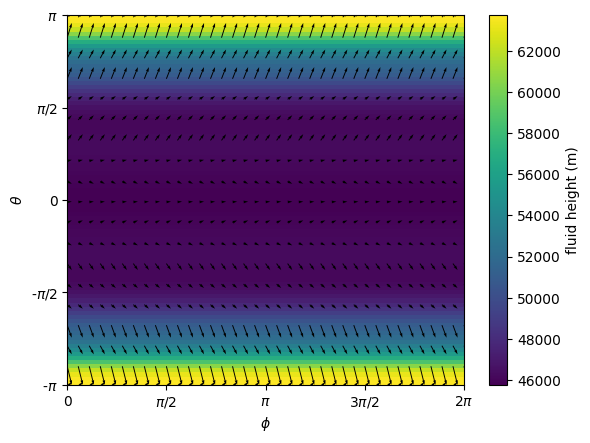

In [140]:
timestep = 60
quiver_stride = 5
plt.pcolormesh(phi, theta, h[:, :, timestep])
# color bar with label
cbar = plt.colorbar()
cbar.set_label("fluid height (m)")

plt.quiver(
    phi[::quiver_stride, ::quiver_stride],
    theta[::quiver_stride, ::quiver_stride],
    u[::quiver_stride, ::quiver_stride, timestep],
    v[::quiver_stride, ::quiver_stride, timestep],
)

plt.ylabel(r"$\theta$")
plt.yticks(
    np.linspace(-np.pi, np.pi, 5), ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"]
)
plt.ylim(-np.pi, np.pi)
plt.xlabel(r"$\phi$")
plt.xticks(
    np.linspace(0, 2 * np.pi, 5), ["0", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"]
)
plt.xlim(0, 2 * np.pi)

In [141]:
print(theta[0,:])

[-3.17649924 -3.10668607 -3.0368729  -2.96705973 -2.89724656 -2.82743339
 -2.75762022 -2.68780705 -2.61799388 -2.54818071 -2.47836754 -2.40855437
 -2.3387412  -2.26892803 -2.19911486 -2.12930169 -2.05948852 -1.98967535
 -1.91986218 -1.85004901 -1.78023584 -1.71042267 -1.6406095  -1.57079633
 -1.50098316 -1.43116999 -1.36135682 -1.29154365 -1.22173048 -1.15191731
 -1.08210414 -1.01229097 -0.9424778  -0.87266463 -0.80285146 -0.73303829
 -0.66322512 -0.59341195 -0.52359878 -0.45378561 -0.38397244 -0.31415927
 -0.2443461  -0.17453293 -0.10471976 -0.03490659  0.03490659  0.10471976
  0.17453293  0.2443461   0.31415927  0.38397244  0.45378561  0.52359878
  0.59341195  0.66322512  0.73303829  0.80285146  0.87266463  0.9424778
  1.01229097  1.08210414  1.15191731  1.22173048  1.29154365  1.36135682
  1.43116999  1.50098316  1.57079633  1.6406095   1.71042267  1.78023584
  1.85004901  1.91986218  1.98967535  2.05948852  2.12930169  2.19911486
  2.26892803  2.3387412   2.40855437  2.47836754  2.

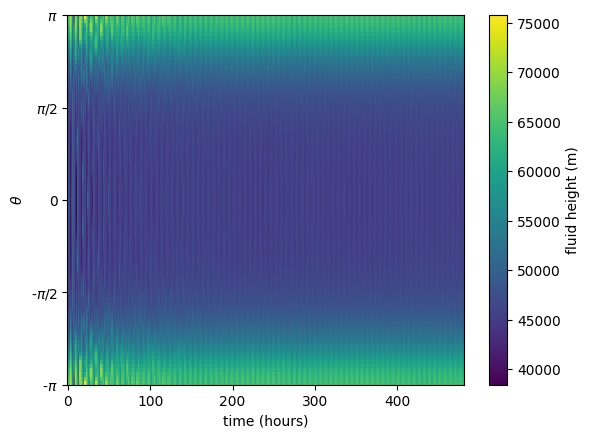

In [142]:
# hovmöller diagram along phi = 0

# find index closest to phi = 0
phi_0 = np.argmin(np.abs(phi[0,:]))
plt.ylabel(r"$\theta$")
plt.yticks(
    np.linspace(-np.pi, np.pi, 5), ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"]
)
plt.ylim(-np.pi, np.pi)

plt.xlabel("time (hours)")

plt.pcolormesh(t[:,0]/3600,theta[0,:], h[phi_0, :, :])
# plt.pcolormesh(t[:,0]/3600,theta[0,:], np.mean(h[:, :, :], axis=0))
cbar = plt.colorbar()
cbar.set_label("fluid height (m)")



/var/folders/38/2bzdl5412qz7lzzz021kxyf80000gp/T/ipykernel_4219/2189284696.py:28: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.dist = 7


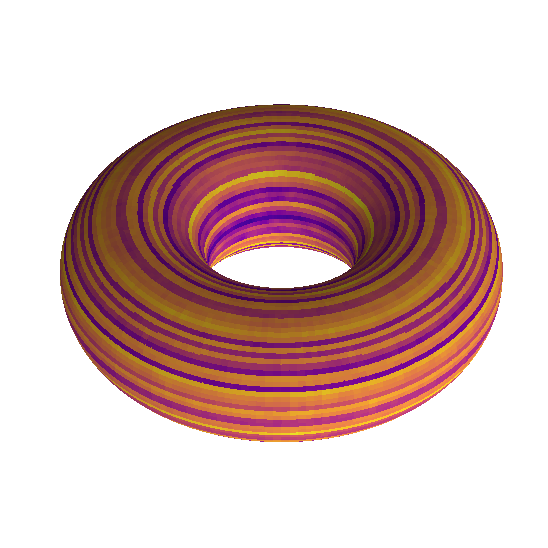

In [143]:
timestep = -1

# normalize h from 0 to 1
h_ts = h[:,:,timestep]
h_mean = np.mean(h_ts, axis=0)
# deviation from mean
h_deviation = h_ts - h_mean
# normalize from 0 to 1
h_norm = (h_deviation - np.min(h_deviation)) / (np.max(h_deviation) - np.min(h_deviation))

aspect_ratio = 0.5
c, a = 1, aspect_ratio
x = (c + a*np.cos(theta)) * np.cos(phi)
y = (c + a*np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_zlim(-1,1)
my_col = cm.plasma(h_norm)
ax1.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=my_col,linewidth=0, antialiased=False)
ax1.view_init(40,10)
# hide axis
ax1.set_axis_off()
# aspect ratio
ax1.set_aspect('equal')
# zoom in
ax1.dist = 7

plt.savefig('toroidal_fluid.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Mean fluid height')

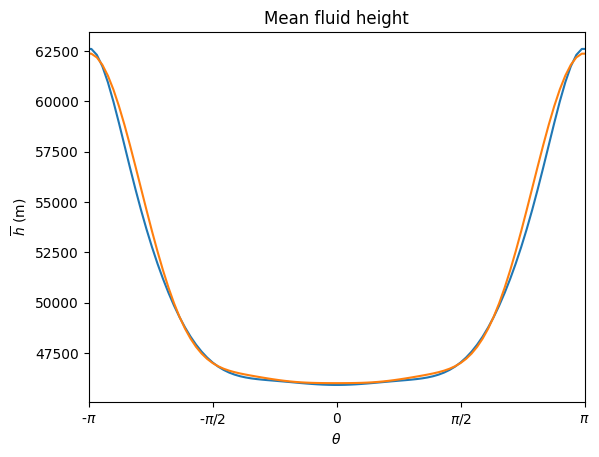

In [221]:
plt.plot(theta1d,h_mean)
plt.plot(theta1d,-np.cos(theta1d)*6_800+50_300 + np.cos(theta1d*2)*3_600 - np.cos(theta1d*3)*1_400 + np.cos(theta1d*4)*300)
plt.xlabel(r"$\theta$")
plt.xticks(
    np.linspace(-np.pi, np.pi, 5), ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"]
)
plt.xlim(-np.pi, np.pi)

plt.ylabel(r"$\overline{h}$ (m)" )
plt.title(r"Mean fluid height")
